# Data Visualization Lecture 2025

This is the notebook associated with the "Data Visualization" lecture delivered at the Winter Semester 2024/25 offering of "Research Methods in Linguistics" at the University of Cologne.

Imagine you take a pause from reading *Frankenstein* by Mary Shelley on a rainy Sunday afternoon. You end up having idle thoughts while your kettle boils. You ask yourself some questions. Questions like:
- What's the most common letter in the text is? 
- In fact, what's the most common word? 
- What's the most common word in the last book you read, *Moby-Dick*? 
- Are there any similar properties between books in English, or books in any language? 
- Hell, what even is language?

You've somehow stumbled upon one of the Big Questions...

---
# Big Question: How can we quantify (and thus compare) properties of large texts?
---
You ponder this Big Question for a while but make no headway. So you go back to *Frankenstein* and think about the very first question you had...

## Smaller Question 1: What's the most common letter in Frankenstein?


Most likely, that letter is *e*, but how can you quantify this? How can you compare with numbers the frequency with which *e* occurs relative to e.g. *f* or *d*?

Let's begin by counting all of the letters in *Frankenstein*. But how do we do this?

Programming allows one to take highly repetitive, structured tasks and to automate them relatively simply.

But you can't just tell a computer: "Hey, can you count all the letters in this book for me?"

I want you to think about this in terms of an algorithm, a recipe that the computer can follow, which means you also need to think about the ingredients and the final product of the algorithm.

### Letter-Counting Problem
**Input:** We have a text, i.e a long string of characters and spaces. You could think of this a being a long strip of letters and spaces one after the other.

**Output:** A count of all the characters that appeared in the text.

The idea that came to you is probably the correct one - Create a structure (in this case a `dictionary`) that keeps a tally of all the letters you've seen so far and walk through the text letter by letter.

Python has variables called dictionaries. There is a unique key & value pair,  a little like a real dictionary, where the word (key) is how you look up its definition (value) in the book.

I've written the code below. I will add comments to my code so that you can hopefully understand what each step does, or at least learn the correct terminology so that you can search for how to do the things I talk about.

In [2]:
# letter_counts will be a name of the dictionary where the 
# keys are the letters in the text (all lowercase)
# and the values are a counter to keep track of how often 
# the respective letter occurs.
letter_counts = {}
# This is the text we are interested in, which we will 
# read in and store in a string
with open("books/frankenstein.txt", "r") as f:
  text = f.read()
# Here we will loop over all the letters in the text, as if we have 
# the text in front of us, and we are tracing out
# each letter as we read through the text
for character in text:
    # We only care about lowercase letters, so we will convert any uppercase 
    # letters to lowercase.
    character = character.lower()
    # Check if the character is an actual letter
    if character.isalpha():
        # If character hasn't been seen before, we add it to the dictionary
        if character not in letter_counts:
            letter_counts[character] = 1
        # If the character is already in the dictionary, we will 
        # increment the counter by 1.
        else:
            letter_counts[character] += 1
print(letter_counts)

{'p': 6121, 'r': 20818, 'o': 25225, 'j': 504, 'e': 46043, 'c': 9243, 't': 30365, 'g': 5974, 'u': 10407, 'n': 24367, 'b': 5026, 's': 21155, 'f': 8731, 'a': 26743, 'k': 1755, 'i': 24613, 'y': 7914, 'm': 10604, 'w': 7638, 'l': 12739, 'd': 16863, 'h': 19725, 'v': 3833, 'z': 243, 'x': 677, 'q': 324}


Notice how ugly this direct print out looks. We should try sorting the dictionary, so that we rank the letters by highest occurrence. We'll also jazz up the print out a bit more so that we can then easily read off the results.

In [18]:
# A function that will print out the letter counts in a "neat way"
def get_char_report(letter_counts, title):
    print(f"--- Begin character report of {title} ---")
    # This will sort the dictionary by the counts of each
    # letter in descending order
    sorted_dict = dict(sorted(letter_counts.items(), 
                              reverse = True, key=lambda item: item[1]))
    # Loop over the sorted keys
    for key in sorted_dict.keys():
        # Print out the letter and its count
        print(f"The '{key}' character was found {letter_counts[key]} times")
    print("--- End of report ---")

In [3]:
# Use the function to print out the letter counts
get_char_report(letter_counts, "Frankenstein")

--- Begin character report of Frankenstein ---
The 'e' character was found 46043 times
The 't' character was found 30365 times
The 'a' character was found 26743 times
The 'o' character was found 25225 times
The 'i' character was found 24613 times
The 'n' character was found 24367 times
The 's' character was found 21155 times
The 'r' character was found 20818 times
The 'h' character was found 19725 times
The 'd' character was found 16863 times
The 'l' character was found 12739 times
The 'm' character was found 10604 times
The 'u' character was found 10407 times
The 'c' character was found 9243 times
The 'f' character was found 8731 times
The 'y' character was found 7914 times
The 'w' character was found 7638 times
The 'p' character was found 6121 times
The 'g' character was found 5974 times
The 'b' character was found 5026 times
The 'v' character was found 3833 times
The 'k' character was found 1755 times
The 'x' character was found 677 times
The 'j' character was found 504 times
The 'q

How much better is that?! And as we expected, 'e' was the most common letter in *Frankenstein*, while 'z' and 'q' are the least common.

### *Moby-Dick* by Herman Melville
Cool, what about *Moby-Dick* by Herman Melville? What does the distribution of letters look like for that book?

But I'm lazy, so I don't want to have to copy and paste all of my code from above again for every book that I want to analyse. I want a reusable bit of code to do this for me. I want a `function`!

All that I will do is simply copy the previous code, and rename `letter_counts` to `character_counts`, and put this inside a function declaration. The function will take as input the path (i.e. where the file is located on your system) to the book I want to analyse.

In [ ]:
def get_character_counts(path_to_book):
    # Read the text from the file and store as a string
    with open(path_to_book, "r") as f:
        text = f.read()
    # Create the character_counts dictionary
    character_counts = {}
    # Loop over each character in the text
    for character in text:
        # Convert letter to lowercase
        character = character.lower()
        # Check if the character is an actual letter
        if character.isalpha():
            # If character hasn't been seen before, 
            # we add it to the dictionary
            if character not in character_counts:
                character_counts[character] = 1
            # If the character is already in the dictionary, we will
            #  increment the counter by 1.
            else:
                character_counts[character] += 1
    # To use the character_counts variable outside of the function,
    # we have to return it
    return character_counts

In [20]:
moby_dick_counts = get_character_counts("books/moby-dick.txt")
# Use the function to print out the letter counts
get_char_report(moby_dick_counts, "Moby Dick")

--- Begin character report of Moby Dick ---
The 'e' character was found 119350 times
The 't' character was found 89875 times
The 'a' character was found 79225 times
The 'o' character was found 70809 times
The 'n' character was found 66781 times
The 'i' character was found 66675 times
The 's' character was found 65139 times
The 'h' character was found 63769 times
The 'r' character was found 53592 times
The 'l' character was found 43351 times
The 'd' character was found 38840 times
The 'u' character was found 27206 times
The 'm' character was found 23626 times
The 'c' character was found 23319 times
The 'w' character was found 22557 times
The 'g' character was found 21288 times
The 'f' character was found 21252 times
The 'p' character was found 17873 times
The 'y' character was found 17243 times
The 'b' character was found 17203 times
The 'v' character was found 8725 times
The 'k' character was found 8228 times
The 'q' character was found 1581 times
The 'j' character was found 1177 times

Nice! We can see a lot of similarities between *Moby-Dick* and *Frankenstein*. In both, 'e' is the most common, and among the characters in the Latin alphabet, 'z' is least common between the two, but notice that *Moby-Dick* has a bunch of characters that aren't in the Latin alphabet, unlike *Frankenstein*.

**Homework exercise:** Where in *Moby-Dick* do the vast majority of these characters occur in the text? Why do they occur?

### La Disparition by Georges Perec
I would like to now also analyse a book that probably not many of you have heard of: Georges Perec's *La Disparition*, a French novel. Why am I interested in this novel? Who knows. But one question I am interested in answering is whether or not the most common characters that occur in French are also the same as the ones in English.

In [5]:
la_disparition_counts = get_character_counts("books/la-disparition.txt")
# Use the function to print out the letter counts
get_char_report(la_disparition_counts, "La disparition")

--- Begin character report of La disparition ---
The 'a' character was found 37874 times
The 'i' character was found 32873 times
The 'n' character was found 27102 times
The 'o' character was found 26622 times
The 'u' character was found 25728 times
The 's' character was found 23102 times
The 't' character was found 22353 times
The 'r' character was found 18074 times
The 'l' character was found 15181 times
The 'd' character was found 9199 times
The 'p' character was found 8429 times
The 'c' character was found 8131 times
The 'm' character was found 7172 times
The 'f' character was found 4639 times
The 'v' character was found 4617 times
The 'b' character was found 3728 times
The 'g' character was found 3714 times
The 'q' character was found 3334 times
The 'h' character was found 2903 times
The 'à' character was found 1821 times
The 'y' character was found 1786 times
The 'j' character was found 1685 times
The 'x' character was found 995 times
The 'k' character was found 470 times
The 'z' 

Obviously there are a number of letters in the French alphabet that are not present in the Latin. We will for the purposes of my ignorant talk only consider the Latin alphabet (which is a strict subset of the French alphabet).

**Question:** What is similar and dissimilar between the results from *La Disparition*, *Moby-Dick*, and *Frankentein*? Is it easy to see the differences?

### How can we show this in a visual way?

I want a simple way to convey the above information and to show different books at the same time. We are visual creatures, so we should lean into that.

I will plot all three books that we've encountered so far.

In [23]:
# I'm going to create a plotting function so that I can visualize the 
# distribution of letters across the two texts
# Plotting in python is done by a package called matplotlib
import matplotlib.pyplot as plt
# The 'string' package allows me to do things like get 
# the 26 letters of the Latin alphabet
import string
# I want to also plot several different books simultaneously, 
# so I'm going to pass a dictionary of books where
# the keys are their titles, 
# and values are the path to those books
def plot_character_counts(books_dictionary):
    fig, ax = plt.subplots(1, figsize=(9,6), dpi=300)
    # I'm going to plot all of the letters in alphabetical order 
    # (i.e. the x axis will be the letter in alphabetical order)
    x = list(string.ascii_lowercase)
    # Loop over the books
    for title, path_to_book in books_dictionary.items():
        character_counts = get_character_counts(path_to_book)
        y = [character_counts[letter] for letter in x]
        # Plot the letter counts with a connecting line
        ax.plot(x, y, label=title)
    ax.legend()
    ax.set_xlabel("Letter")
    ax.set_xticks(x)
    ax.set_ylabel("Count")
    ax.set_ylim(0)
    ax.set_title("Letter counts in different books")
    plt.show()

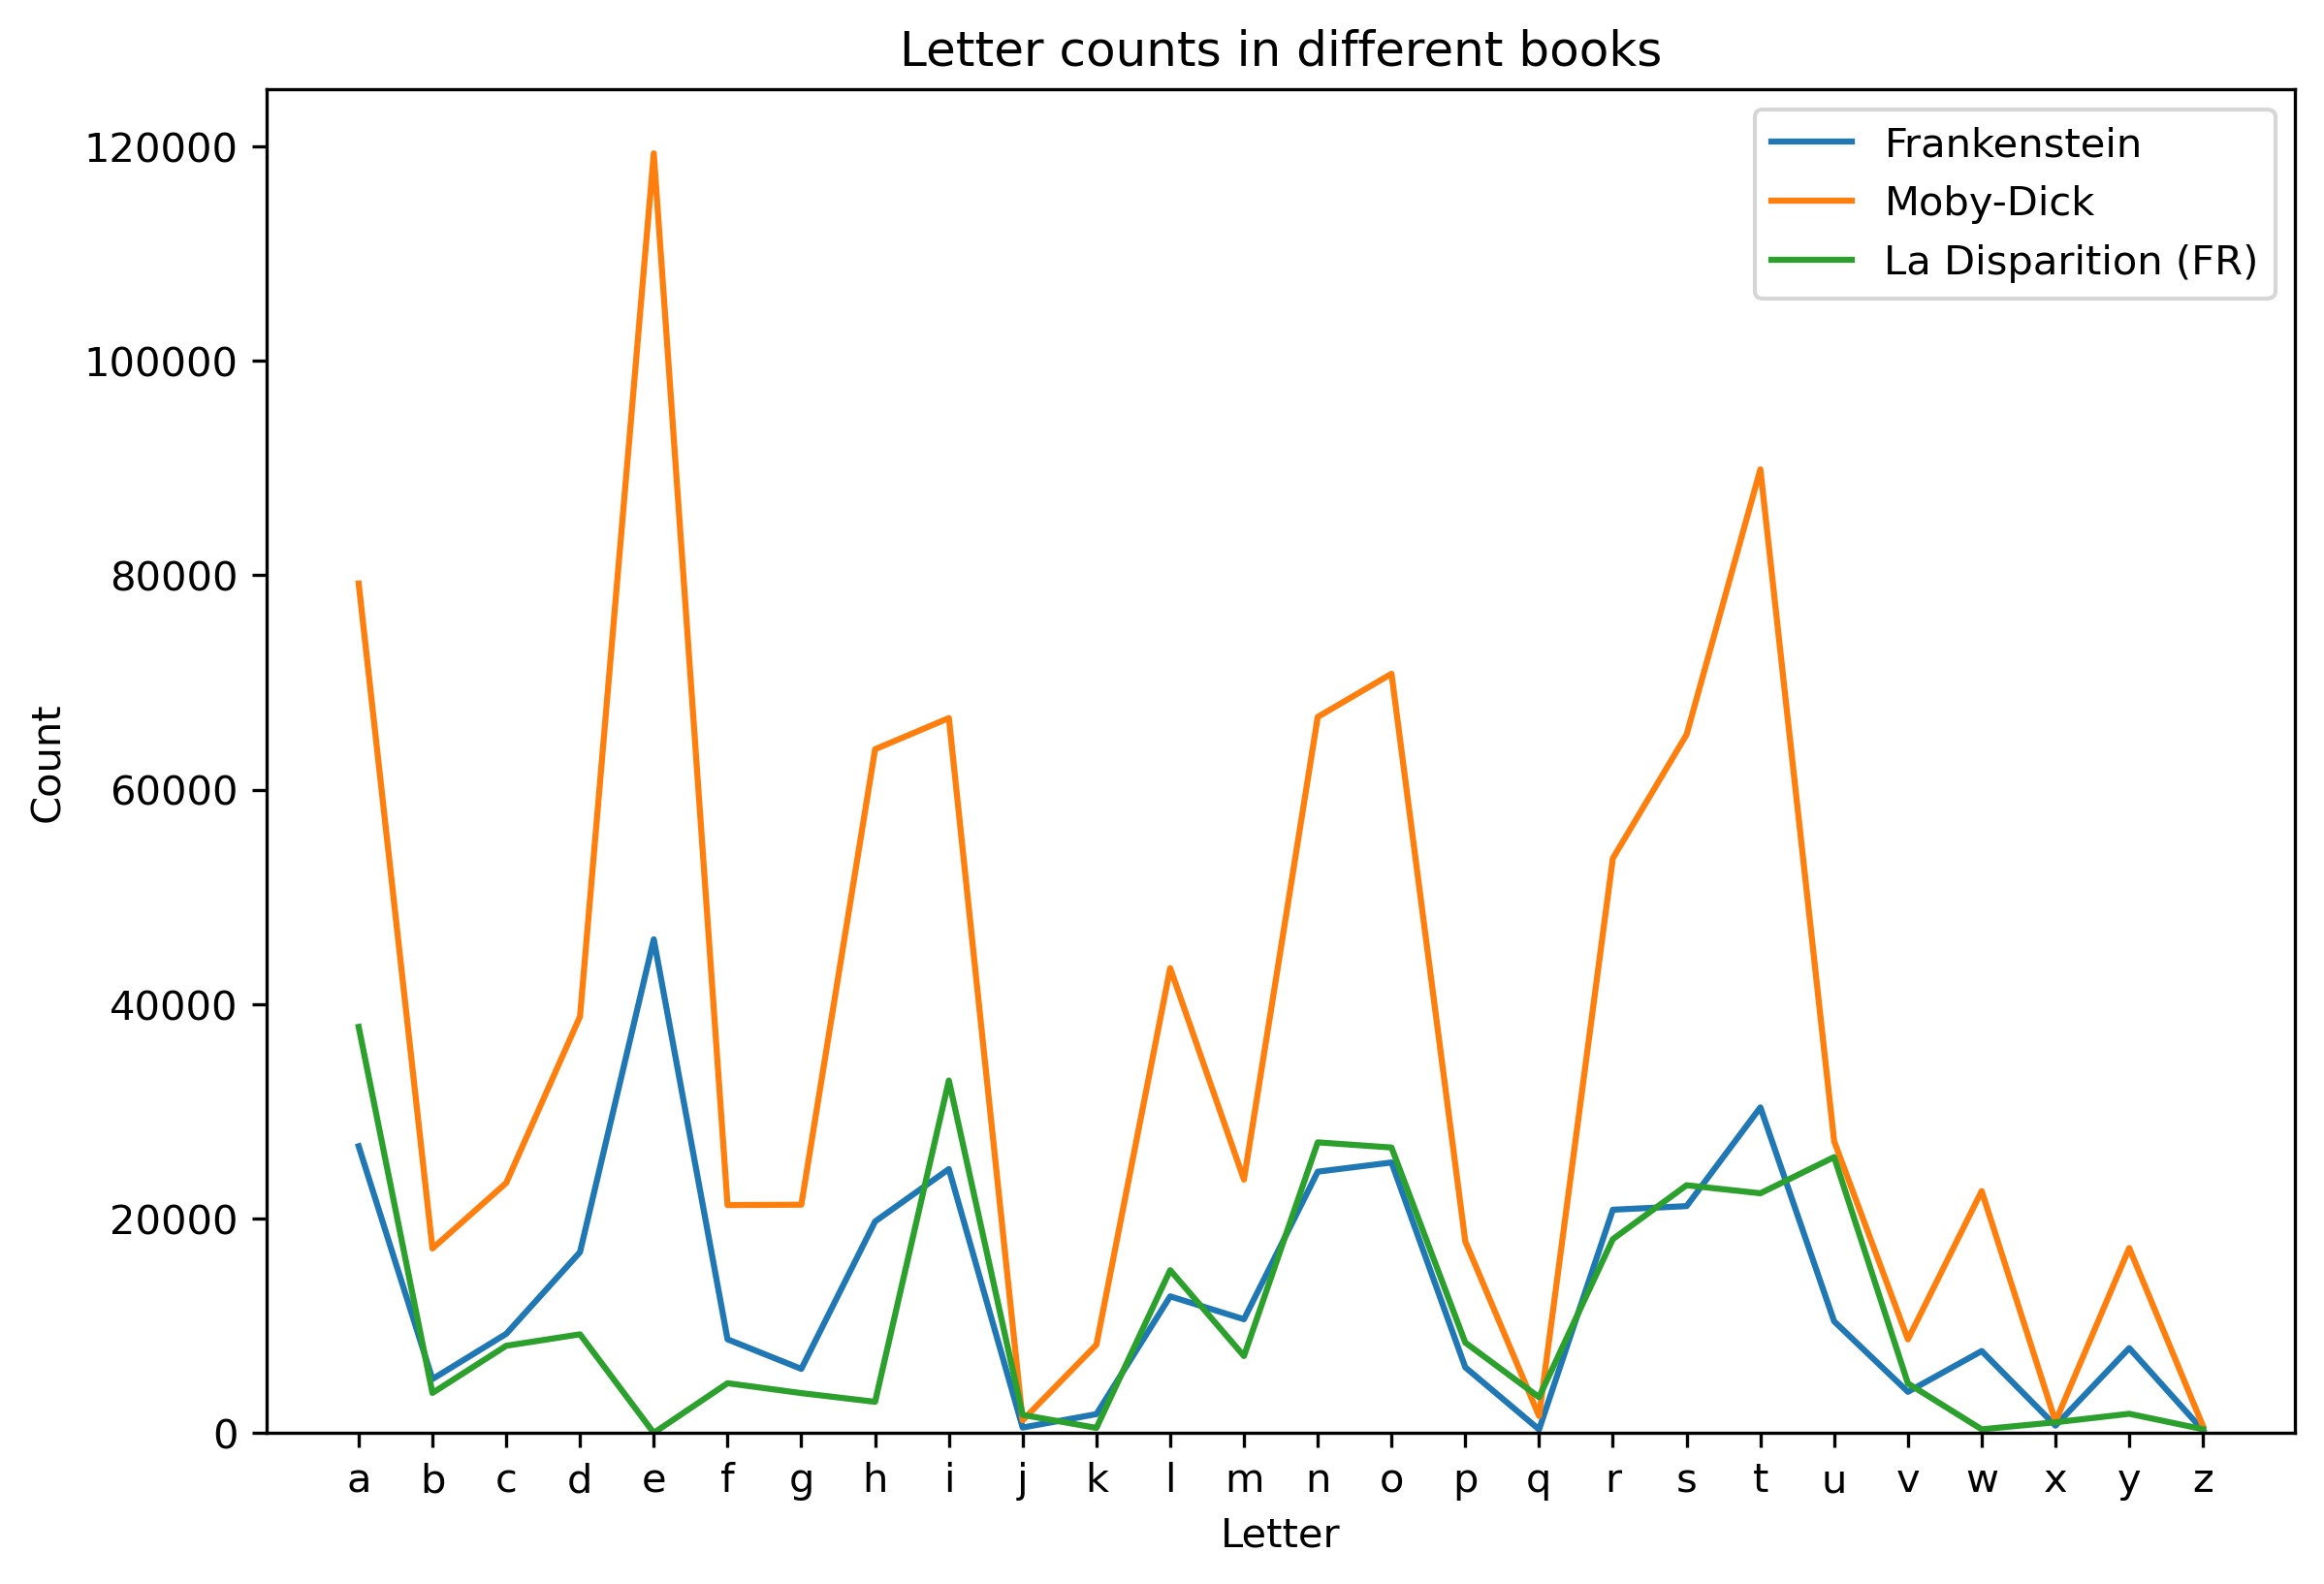

In [24]:
books = {"Frankenstein": "books/frankenstein.txt", "Moby-Dick": "books/moby-dick.txt", "La Disparition (FR)": "books/la-disparition.txt"}
plot_character_counts(books)

These distributions don't tell us much, but it does seem like *Frankenstein* and *Moby Dick* have similar distributions, but then why don't then line up?

You should notice that the total count of the letters is not the same for the three texts (the area under the curve). So let's plot the frequencies (count of each letter divided by the total number of letters) instead

In [25]:
# Exactly the same function as before, but notice the division (aka normalization) before we plot
def plot_character_frequencies(books_dictionary):
    fig, ax = plt.subplots(1, figsize=(9,6), dpi=300)
    x = list(string.ascii_lowercase)
    # Loop over the books
    for title, path_to_book in books_dictionary.items():
        character_counts = get_character_counts(path_to_book)
        y = [character_counts[letter] for letter in x]
        # Divide each count by the total count of letters
        y = [n/sum(y) for n in y]
        ax.plot(x, y, label=title)
    ax.legend()
    ax.set_xlabel("Letter")
    ax.set_xticks(x)
    ax.set_ylabel("Frequency")
    ax.set_ylim(0)
    ax.set_title("Letter frequencies in different books")
    plt.show()

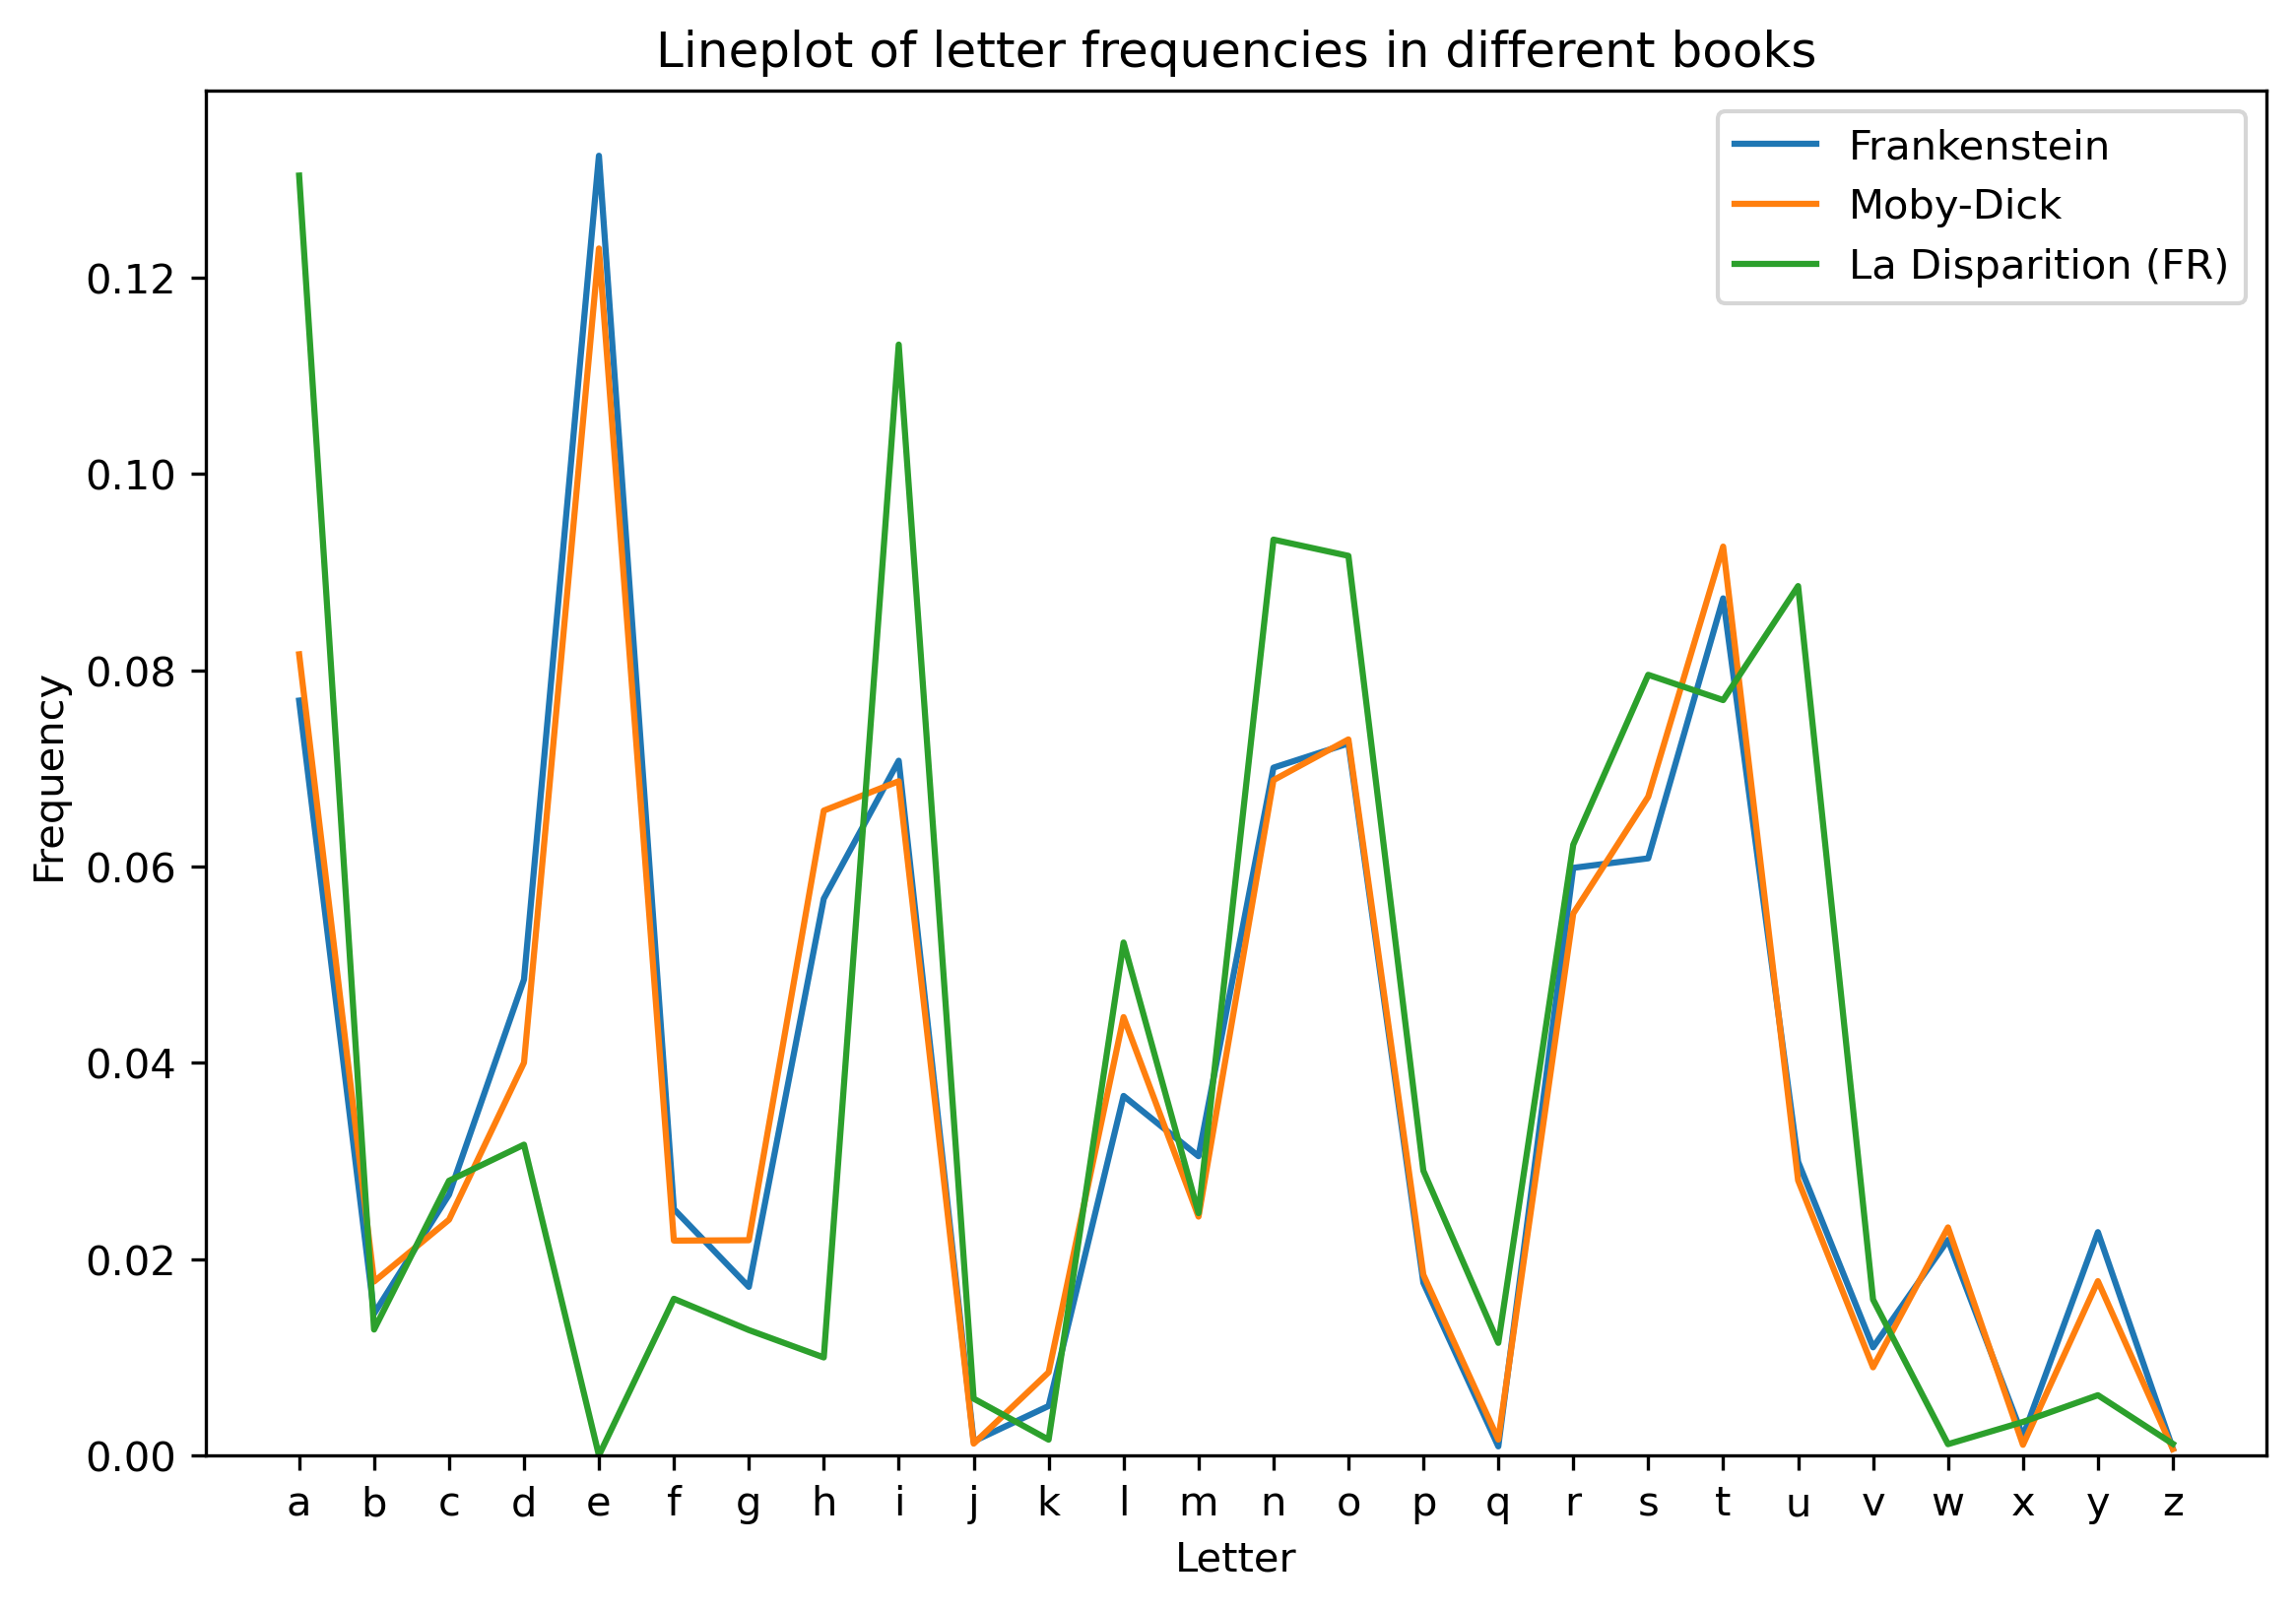

In [ ]:
plot_character_frequencies(books)
# What similarities and differences do you see?

Great! Now we can really see that *Frankenstein* and *Moby-Dick* have extremely similar distributions for how frequently their authors use various characters. But *La Disparition* is totally different! How come?

### Maybe this is just language-specific?
*Moby-Dick* and *Frankenstein* are both written in English, while Perec's *La Disparition* (*The Void* is the common title for the English translation) is in French. Maybe the differences stem primarily from the use of different languages? What about another classic French novel, Gustave Flaubert's *Madame Bovary*?

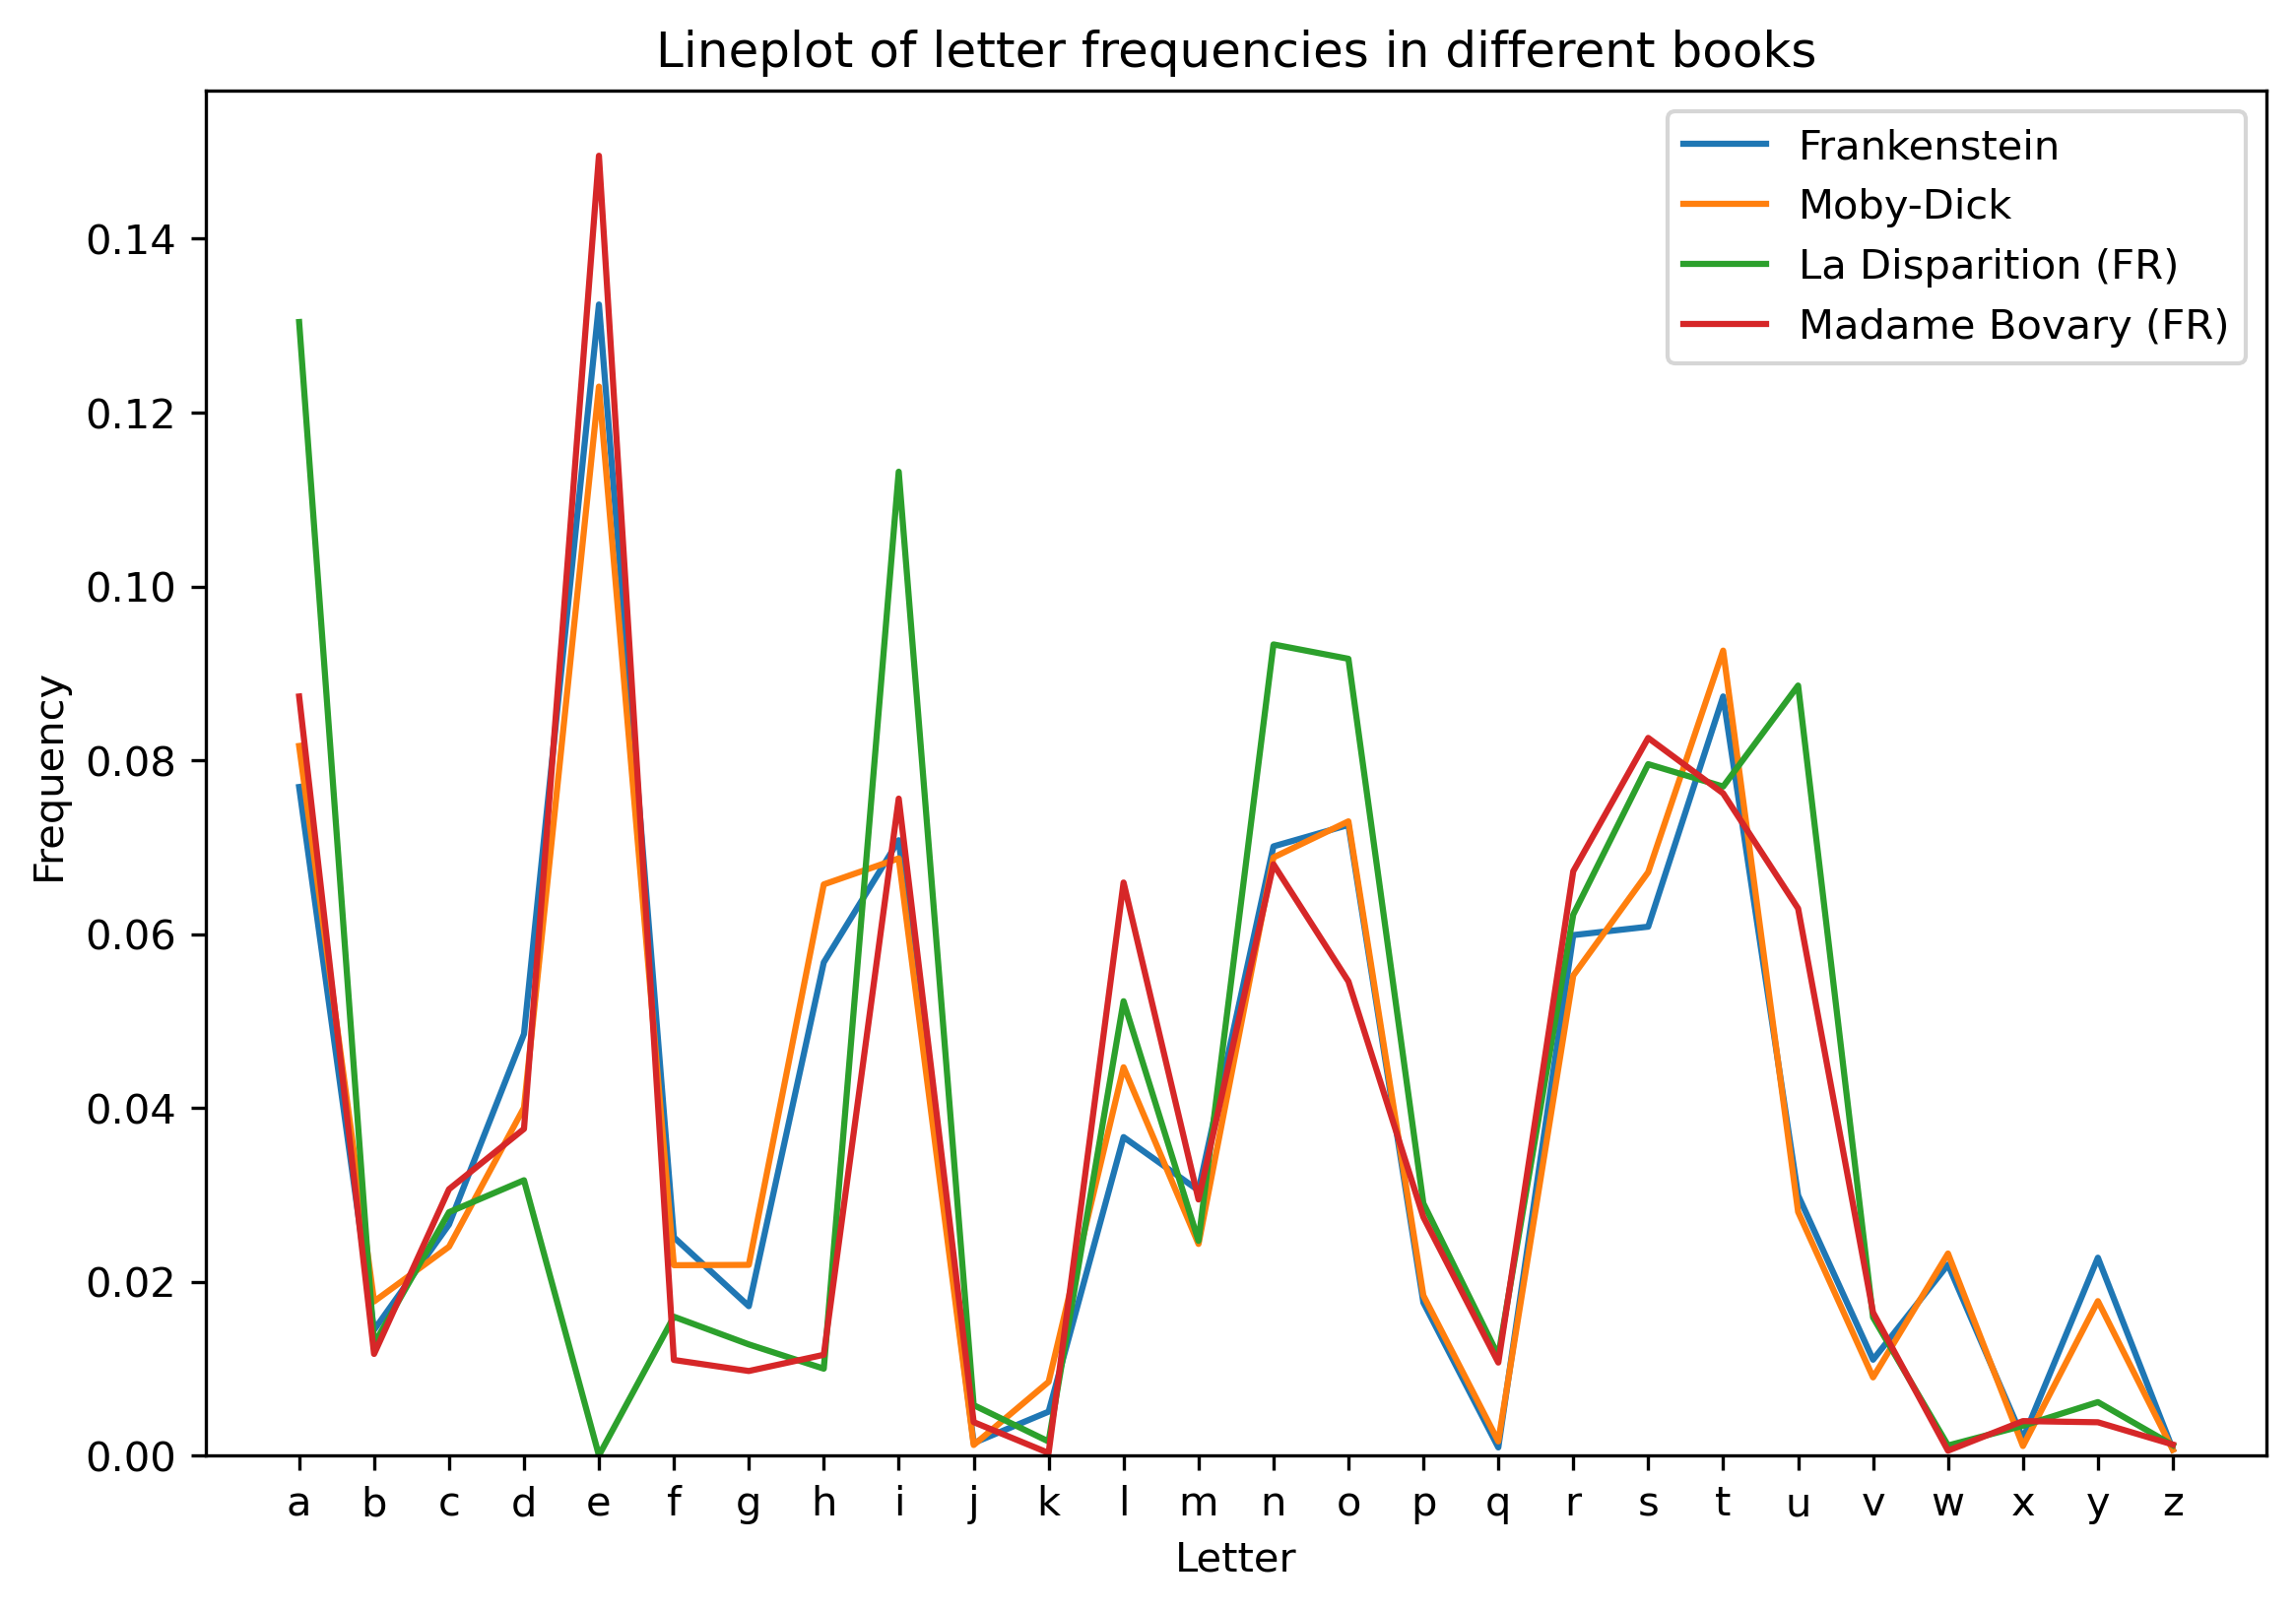

In [28]:
# Here I'm adding the book Madame Bovary to the books dictionary
books["Madame Bovary (FR)"] = "books/madame-bovary-fr.txt"
plot_character_frequencies(books)
# Again, what's different and what's similar?

### Opening a Can of Worms

**Exercise:** *(left to the reader)*  What do we make of this distribution? Is it truly down to differences in language? What could have made *La Disparition* have its characteristic difference in letter frequency distribution?

**Little Question:** *Moby-Dick*, *Frankenstein*, and *Madame Bovary* were all written in the first half of the 19th Century, while *La Disparition* was written in 1969 (more than 100 years later than the oldest of the previous three), so even if we rule out language-specificity as being the root cause between the differences, what other reason(s) could there be for their differences?

**Smaller Question**  *(left to the reader)* What are the similarities between several languages? Do closely-related languages have similar letter-count distributions?

## Letters aren't continuous
I've been lying to you.

In the above plots, I have been using a line plot, where the values are all joined together with a continuous line, but this implies a continuous transition from one point to another. But there isn't a letter between "d" and "e". These are *discrete states*. Maybe we should try a scatter plot?

In [29]:
# This function is mostly the same as the last, but we perform a 
# scatter plot instead of a line plot
def scatter_plot_character_frequencies(books_dictionary):
    fig, ax = plt.subplots(1, figsize=(9,6), dpi=300)
    x = list(string.ascii_lowercase)
    # Loop over the books
    for title, path_to_book in books_dictionary.items():
        character_counts = get_character_counts(path_to_book)
        y = [character_counts[letter] for letter in x]
        y = [n/sum(y) for n in y]
        # Notice this is scatter instead of plot now
        ax.scatter(x, y, label=title)
    ax.legend()
    ax.set_xlabel("Letter")
    ax.set_xticks(x)
    ax.set_ylabel("Frequency")
    ax.set_ylim(0)
    ax.set_title("Scatter plot of letter frequencies in different books")
    plt.show()

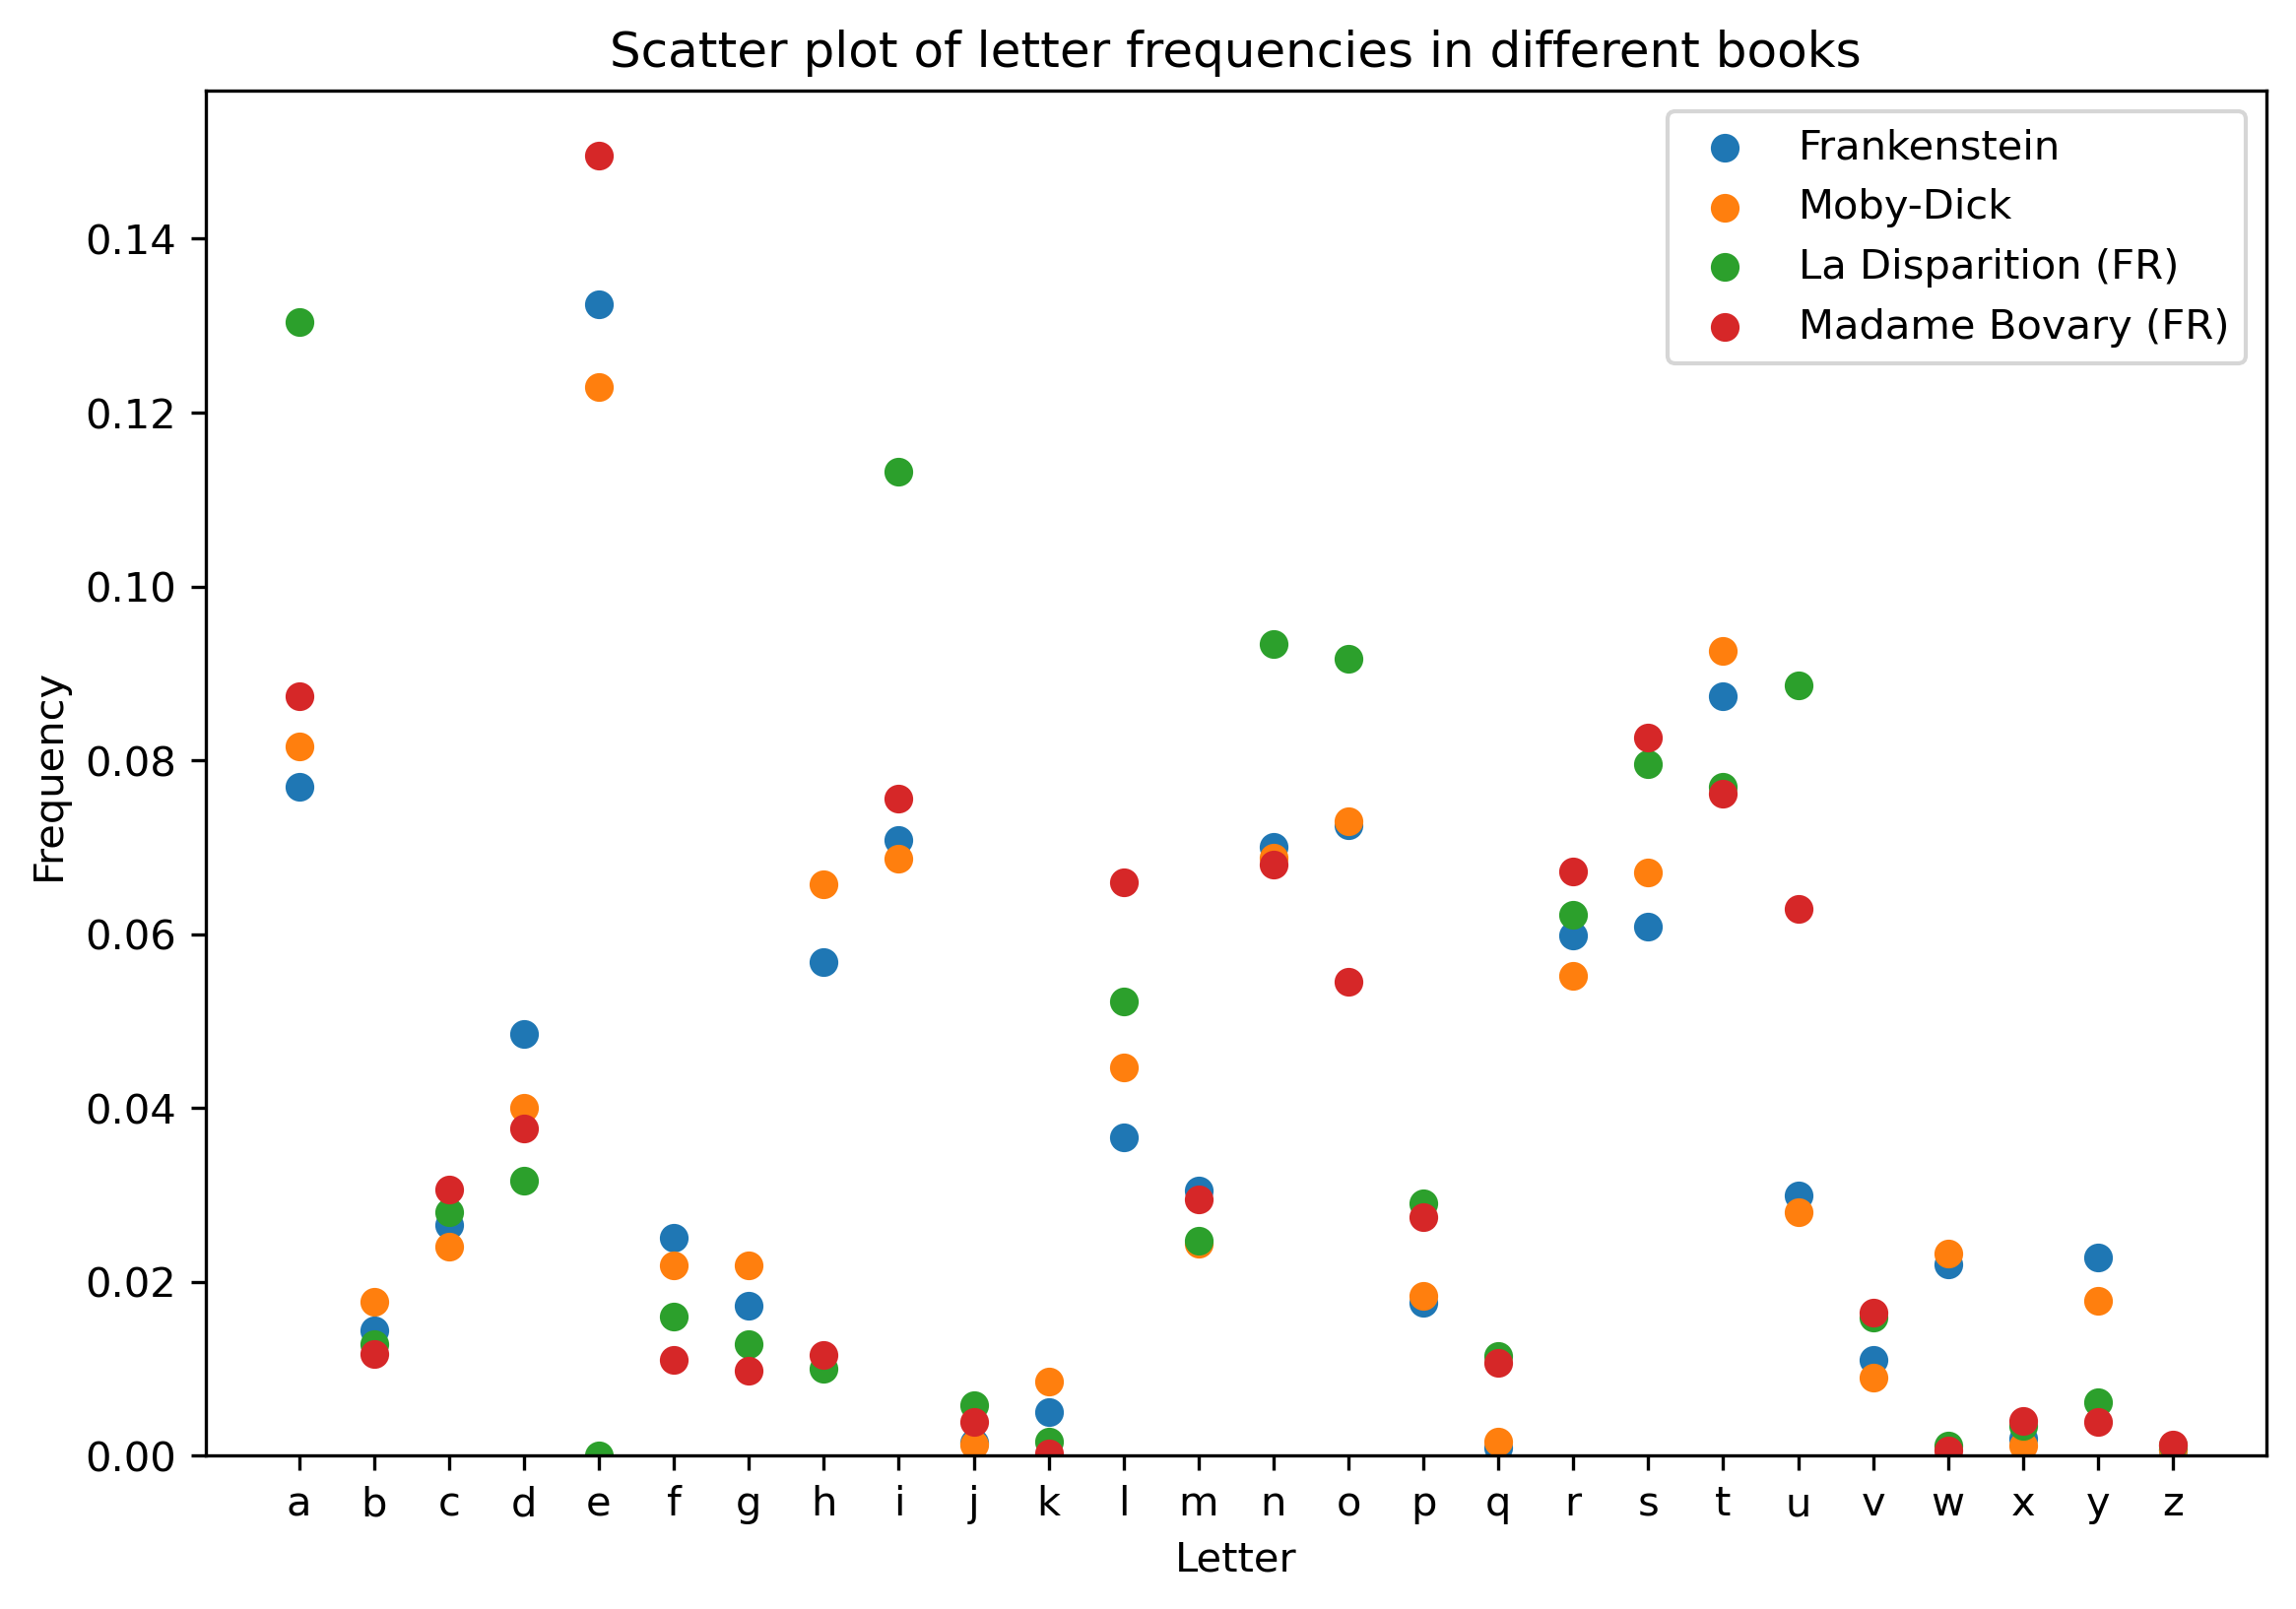

In [30]:
scatter_plot_character_frequencies(books)

## Yuck!
Scatter plots aren't particularly great for visualizing large numbers of **connected** data. Here all the orange dots belong together, instead of apart, so we should kind of connect them together, but not with a straight line.

Scatter plots would be a great option if you wanted to plot for example the length of a book in words versus the number of characters in that book. I have a slide at the end (or a set of cells in the jupyter notebook) with a simple simulated example.

What we should really use are grouped barplots!

To simplify the handling of the data, I'm going to use a Python package called `pandas` which has the very useful object, the `DataFrame` (the programming language `R` has something extremely similar, which inspired the `pandas` one). You can sort of imagine it as an Excel spreadsheet.

In [32]:
# To achieve this task, I'm going to use a package called pandas, 
# which is a powerful data manipulation library
# First, I need to import the package
import pandas as pd
# I'm going to create a function that will return 
# a pandas dataframe of the character counts
def get_books_dataframe(books):
    df = pd.DataFrame()
    for book in books:
        character_counts = get_character_counts(books[book])
        # Only include the English alphabet 
        # (a bias, but it will have to do for now)
        character_counts = {k: v for k, v in 
                            character_counts.items() if k in string.ascii_lowercase}
        # Again, we should normalize the data to compare the frequencies 
        total = sum(character_counts.values())
        character_counts = {k: v/total for k, v in character_counts.items()}
        # I'm going to add a new row to the dataframe, 
        # where the first column is the title of the book
        # and the rest of the columns are the counts of each letter
        df = pd.concat([df, pd.DataFrame(character_counts, index=[book])])
    return df

In [33]:
# Use the function and see what it looks like
books_df = get_books_dataframe(books)
# These two lines allow me to name the "title" column of the dataframe
books_df.reset_index(inplace=True)
books_df.rename(columns={"index": "title"}, inplace=True)
# Simple print out of the dataframe
books_df.head()

,title,p,r,o,j,e,c,t,g,u,...,y,m,w,l,d,h,v,z,x,q
0,Frankenstein,0.017607,0.059882,0.072559,0.001450,0.132441,0.026587,0.087344,0.017184,0.029935,...,0.022764,0.030502,0.021970,0.036643,0.048506,0.056738,0.011025,0.000699,0.001947,0.000932
1,Moby-Dick,0.018418,0.055228,0.072970,0.001213,0.122993,0.024031,0.092618,0.021938,0.028036,...,0.017769,0.024347,0.023245,0.044674,0.040025,0.065715,0.008991,0.000655,0.001096,0.001629
2,La Disparition (FR),0.029026,0.062239,0.091674,0.005802,0.000014,0.027999,0.076973,0.012789,0.088595,...,0.006150,0.024697,0.001160,0.052276,0.031677,0.009997,0.015899,0.001195,0.003426,0.011481
3,Madame Bovary (FR),0.027436,0.067227,0.054557,0.003847,0.149554,0.030646,0.076189,0.009728,0.062943,...,0.003831,0.029462,0.000558,0.065934,0.037584,0.011593,0.016463,0.001269,0.003965,0.010699


We can now use the dataframe to plot grouped bar charts.

In [36]:
# I'm importing a special plotting library called seaborn
# Seaborn is built on top of matplotlib and provides a 
# high-level interface for creating attractive and 
# informative statistical graphics
import seaborn as sns

# Function to plot the grouped barplot
def plot_grouped_barplot(df):
    # Select the alphabetical columns
    alphabet_cols = df.columns.difference(['title'])
    df_alphabet = df[['title'] + list(alphabet_cols)]
    # Melt the DataFrame for a grouped barplot
    melted_df = df_alphabet.melt(id_vars='title', var_name='letter', value_name='count')
    # Sort letters alphabetically
    melted_df['letter'] = melted_df['letter'].str.lower()  # Ensure lowercase
    melted_df = melted_df.sort_values('letter')
    # Create the grouped barplot
    plt.figure(figsize=(9,6), dpi=300)
    # NOTE: here, you can really play around 
    # with the palette to get different colors
    # Try commenting and uncommenting various 
    # one sns.barplot line at a time and re-running
    # to see the effect on the final plot 
    # (commenting is done by adding a # in front of the line)
    #sns.barplot(data=melted_df, x='letter', y='count', hue='title')
    sns.barplot(data=melted_df, x='letter', y='count', hue='title', palette='muted')
    #sns.barplot(data=melted_df, x='letter', y='count', hue='title', palette='deep')
    #sns.barplot(data=melted_df, x='letter', y='count', hue='title', palette='Set2')
    #sns.barplot(data=melted_df, x='letter', y='count', hue='title', palette='pastel')
    #sns.barplot(data=melted_df, x='letter', y='count', hue='title', palette='colorblind')
    plt.title('Grouped Barplot of Alphabetical Letters in Various Texts', fontsize=16)
    plt.xlabel('Letter', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(title='Title', fontsize=12)
    plt.tight_layout()
    plt.show()

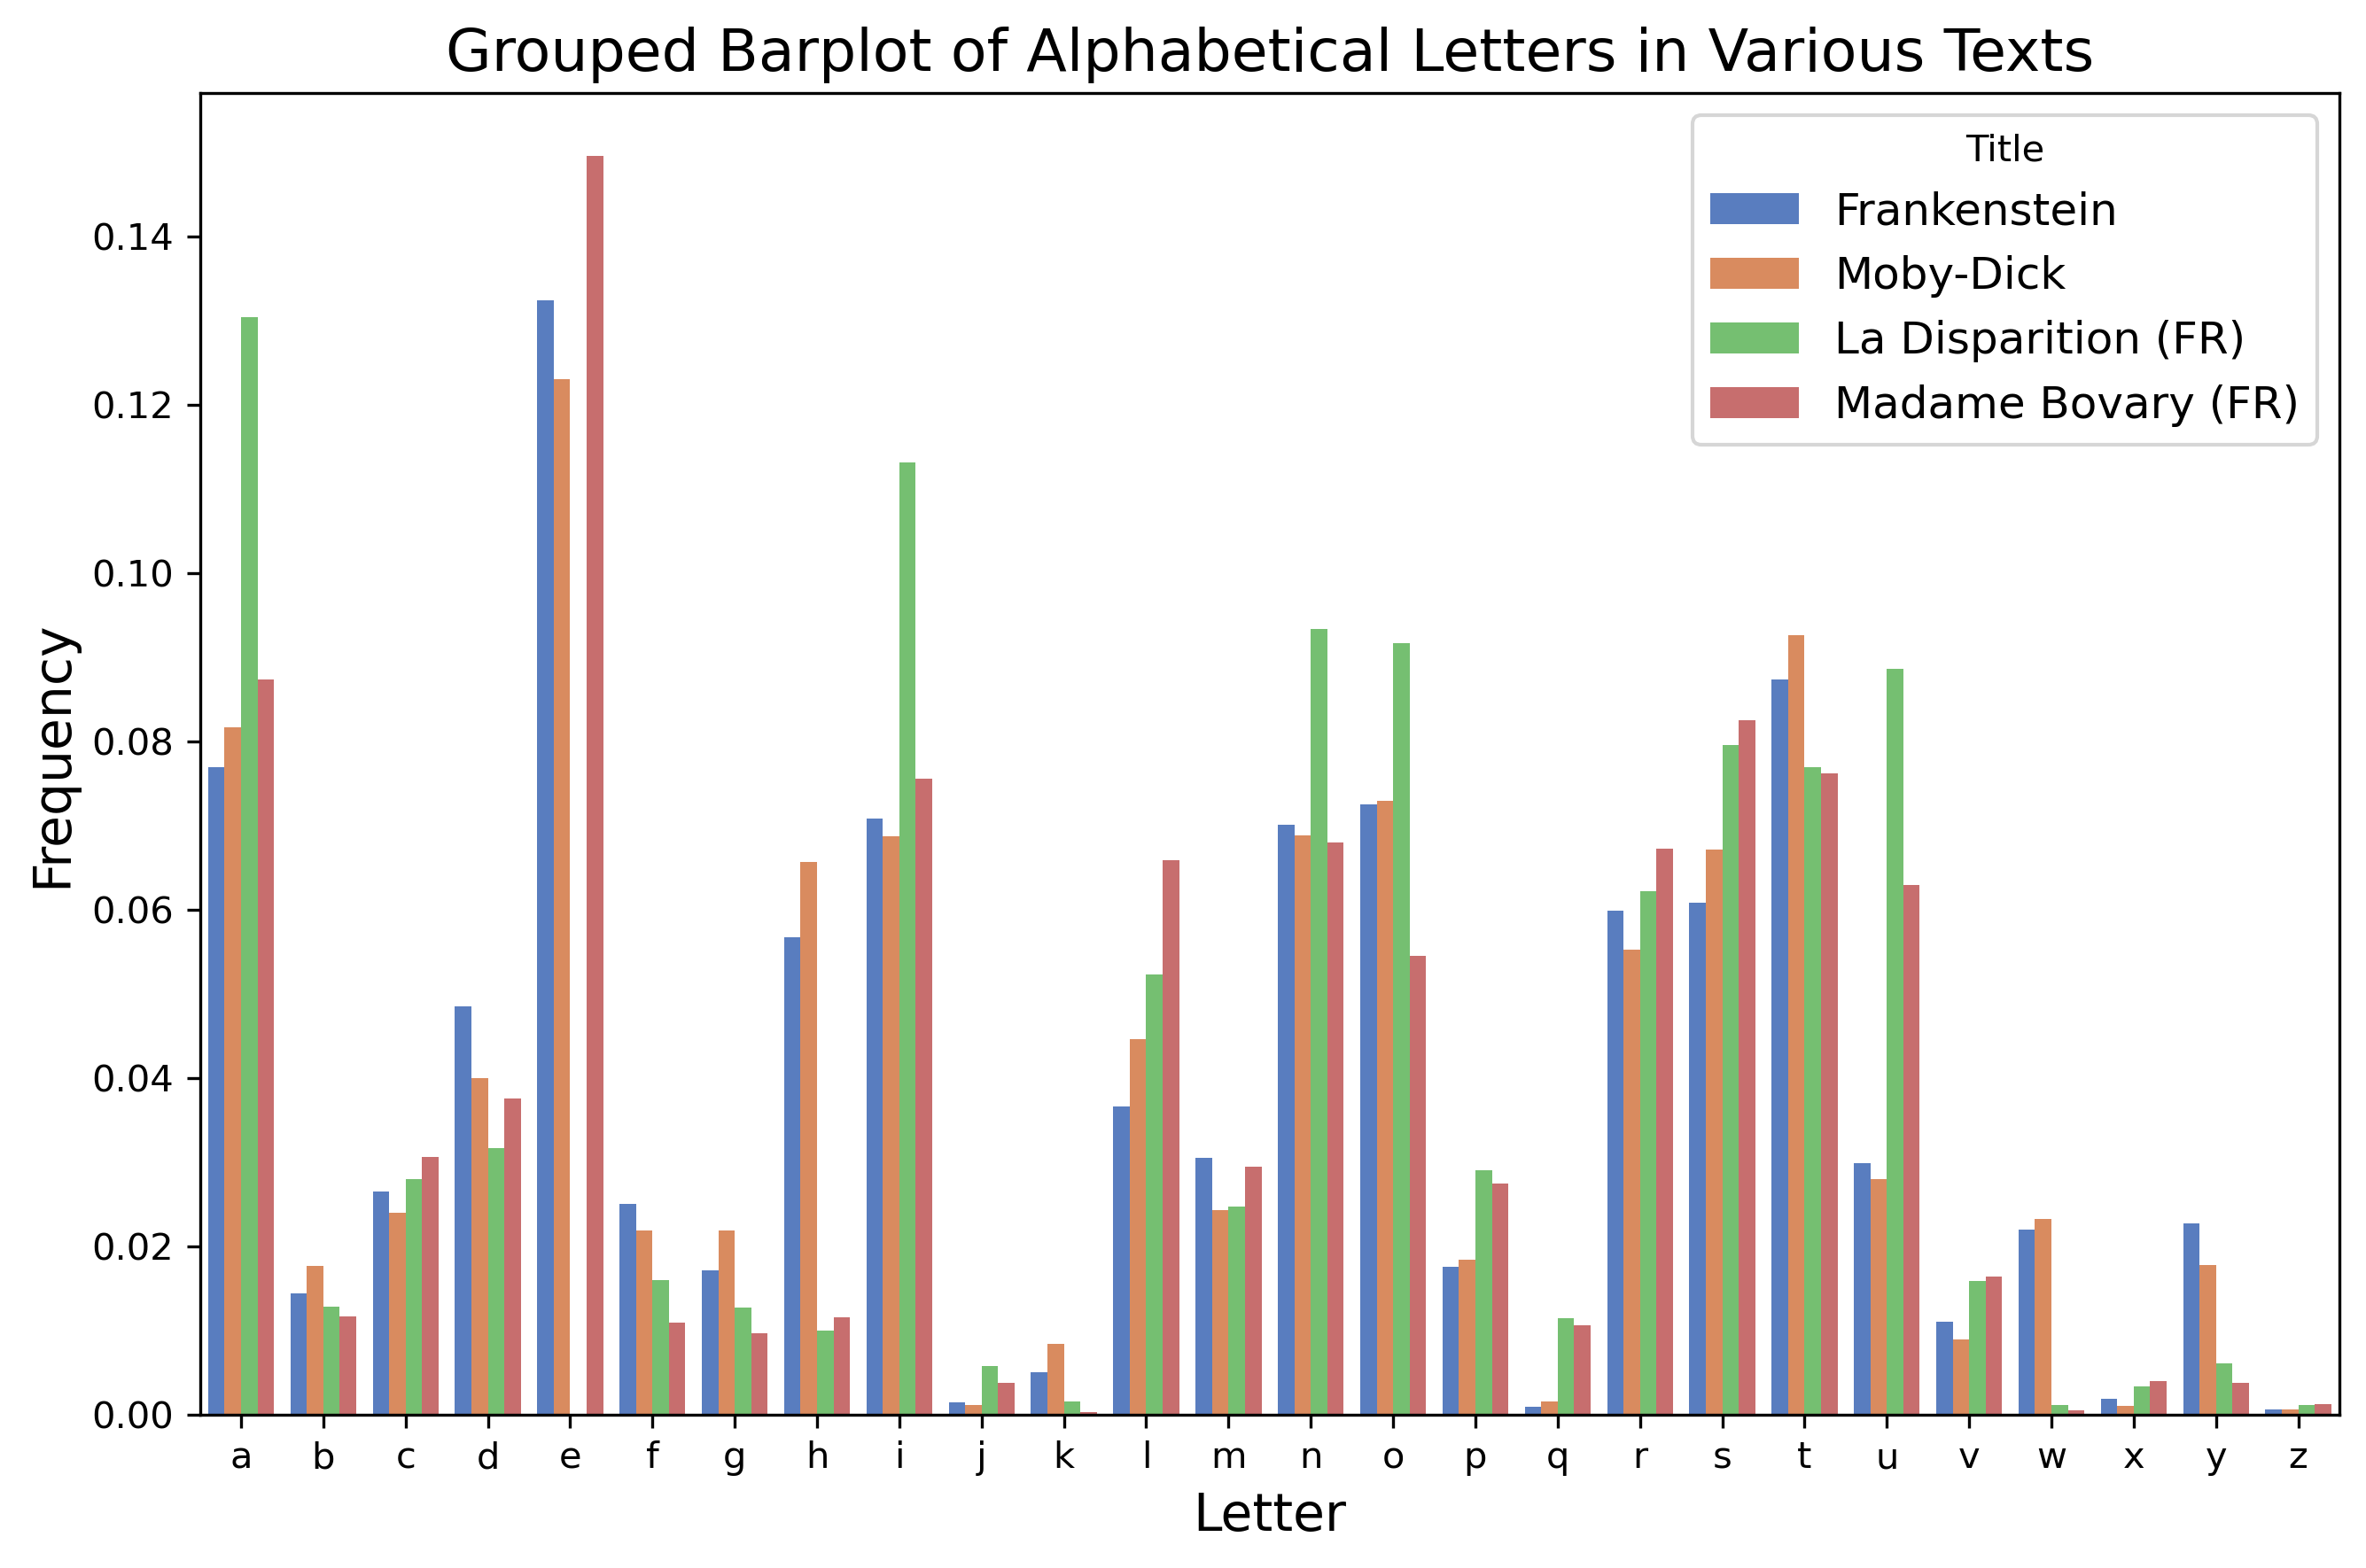

In [37]:
plot_grouped_barplot(books_df)

### Data Visualization and Accessibility
Something to keep in mind whenever you are producing plots is to try and make plots that are accessible to as many people as possible in the final product (term paper, journal article, thesis, *etc*). That means taking into account things like colourblindness, and making sure your plots are "readable".

For picking colour schemes, I turn time and time again to https://colorbrewer2.org to help me pick sets of colours that match the type of data I'm trying to show.

## Headway!

We've made great progress in answering our first question, as well as a bunch of other ones! Typically this is how it goes: you **try to answer** a question by performing an experiment and **upon visualizing** the results, you look at the screen, smudging it with your greasy thumbs, wondering if what you are seeing is actually what you are seeing.

This typically leads to more questions than you started with... Maybe right now, you have a couple of your own simmering at the back of your brain

But, let's for a second put those thoughts to rest, and stick with the ones I had prepared for the rest of this talk.

## Smaller Question 2: What's the most common word in *Frankenstein*?

We can perform a similar analysis, but instead of letters, we use **words**. I would suggest that you yourself try **writing the algorithm** for this problem, just as we did for the letter counting, before seeing my solution.

#### Word Counting Problem:
**Input:** We have a text, i.e a long string of characters and spaces.

**Output:** A count of all the *words* that appeared in the text.

---

Disclaimer: *I will for the purposes of this talk not consider the technicalities of what a word is. I will count whatever isn't a whitespace to be a character. Obviously, there are many ways to do this analysis, but as is the case with any scientific endeavour, you do have to draw the border somewhere.*

In [38]:
# The count words function will take the long string that 
# is the text and split it by whitespace
def count_words(path_to_book):
    # Split the text by whitespace
    list_words = text.split()
    # Create a dictionary to store the counts of each word
    word_counts = {}
    # Loop over each word
    for word in list_words:
        # If the word hasn't been seen before, add it to the dictionary
        if word not in word_counts:
            word_counts[word] = 1
        # If the word has been seen before, increment the count by 1
        else:
            word_counts[word] += 1
    return word_counts

In [39]:
frankenstein_text = open("books/frankenstein.txt", "r")
count_words(frankenstein_text)

{'Project': 78,
 "Gutenberg's": 1,
 'Frankenstein,': 10,
 'by': 464,
 'Mary': 4,
 'Wollstonecraft': 4,
 '(Godwin)': 4,
 'Shelley': 4,
 'This': 69,
 'eBook': 5,
 'is': 322,
 'for': 449,
 'the': 4056,
 'use': 17,
 'of': 2741,
 'anyone': 7,
 'anywhere': 2,
 'at': 304,
 'no': 154,
 'cost': 2,
 'and': 2972,
 'with': 696,
 'almost': 39,
 'restrictions': 2,
 'whatsoever.': 2,
 'You': 64,
 'may': 107,
 'copy': 8,
 'it,': 33,
 'give': 23,
 'it': 372,
 'away': 37,
 'or': 240,
 're-use': 2,
 'under': 29,
 'terms': 23,
 'Gutenberg': 20,
 'License': 8,
 'included': 3,
 'this': 335,
 'online': 4,
 'www.gutenberg.net': 2,
 'Title:': 1,
 'Frankenstein': 9,
 'The': 267,
 'Modern': 2,
 'Prometheus': 2,
 'Author:': 1,
 'Release': 1,
 'Date:': 1,
 'June': 1,
 '17,': 1,
 '2008': 1,
 '[EBook': 1,
 '#84]': 1,
 'Language:': 1,
 'English': 6,
 '***': 6,
 'START': 1,
 'OF': 10,
 'THIS': 5,
 'PROJECT': 4,
 'GUTENBERG': 3,
 'EBOOK': 2,
 'FRANKENSTEIN': 2,
 'Produced': 2,
 'Judith': 2,
 'Boss,': 2,
 'Christy': 2,


#### Sidenote:
Here's an excellent video I watched about the impact good data visualization (& consequently good science communication) can have on people's lives:
https://www.youtube.com/watch?v=BwtwOqdlY5E

# Summary

We didn't really get around to answering the Big Question: **How can we quantify (and thus compare) properties of large texts?** 

There **may never be** a fully satisfactory answer to it, but we've thought about it pretty hard and we've learned some skills along the way. 

The only way to attempt to answer a Big Question is to **try doing it, and seeing what sticks**.

I hope you've all had a nice time with this notebook, and if you have any questions, please don't hesistate to contact me. 

Please feel free to use any of the methods or code for your own purposes. Y

ou are **strongly encouraged** to modify it and **make it your own** and, above all, to *experiment* and iterate upon what I've talked superficially here.

### Postscript
All the plots I've used in this talk are primarily using the very basic/conventional plotting functionality in `matplotlib`, but there is a vast world of data science tools. Examples in Python include:
- `seaborn`
- `plotly`
- `ggplot2`
- `Bokeh`

This is not to speak of the programming language a lot of you might already know: `R` and all of its data visualization libraries and packages, which I know virtually nothing about, but there are many webpages out there dedicated to ranking the "best" of each of these.

My advice:
Pick a tool you want to get good with and stick with it for a project, *unless there is a good reason to change (e.g. you can't do what you need to with the current tool)*.

At the end of the day, all of these programs and libraries are just tools, not immutable philosophies.

#### Postpostscript
I converted the jupyter notebook to slides using:
```bash
uvx --with nbconvert --from jupyter-core jupyter nbconvert --to slides data-visualization.ipynb
```